<a href="https://colab.research.google.com/github/elizabeth-evolkmar/Trabajo-parqueadero-udea/blob/main/Prueba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Eduar

In [ ]:
!pip install -q pyomo
from pyomo.environ import *
from pyomo.opt import *

# instal cbc
!apt-get install -y -qq coinor-cbc
# Set the solver
solver = solvers.SolverFactory('cbc', executable='/usr/bin/cbc')


Selecting previously unselected package coinor-libcoinutils3v5:amd64.
(Reading database ... 126312 files and directories currently installed.)
Preparing to unpack .../0-coinor-libcoinutils3v5_2.11.4+repack1-2_amd64.deb ...
Unpacking coinor-libcoinutils3v5:amd64 (2.11.4+repack1-2) ...
Selecting previously unselected package coinor-libosi1v5:amd64.
Preparing to unpack .../1-coinor-libosi1v5_0.108.6+repack1-2_amd64.deb ...
Unpacking coinor-libosi1v5:amd64 (0.108.6+repack1-2) ...
Selecting previously unselected package coinor-libclp1.
Preparing to unpack .../2-coinor-libclp1_1.17.5+repack1-1_amd64.deb ...
Unpacking coinor-libclp1 (1.17.5+repack1-1) ...
Selecting previously unselected package coinor-libcgl1:amd64.
Preparing to unpack .../3-coinor-libcgl1_0.60.3+repack1-3_amd64.deb ...
Unpacking coinor-libcgl1:amd64 (0.60.3+repack1-3) ...
Selecting previously unselected package coinor-libcbc3:amd64.
Preparing to unpack .../4-coinor-libcbc3_2.10.7+ds1-1_amd64.deb ...
Unpacking coinor-libcbc3:

In [ ]:
from pyomo.opt import SolverFactory

if SolverFactory('glpk').available():
    print("✅ GLPK está correctamente instalado y disponible.")
else:
    print("❌ GLPK NO está disponible.")


✅ GLPK está correctamente instalado y disponible.


In [ ]:
import pyomo.environ as pyo
solver = pyo.SolverFactory('glpk', executable='/usr/bin/glpsol')


In [ ]:
from pyomo.environ import *
import matplotlib.pyplot as plt

# Función que resuelve el problema para valores dados de w1 y w2
def resolver_modelo(w1, w2):
    model = ConcreteModel()
    model.x = Var(domain=NonNegativeReals)
    model.y = Var(domain=NonNegativeReals)

    # Función objetivo combinada
    model.obj = Objective(expr=w1 * (-3 * model.x + 2 * model.y) + w2 * (4 * model.x - 3 * model.y), sense=maximize)

    # Restricciones
    model.constraint1 = Constraint(expr=model.x + model.y <= 10)
    model.constraint2 = Constraint(expr=2 * model.x + 3 * model.y >= 12)

    # Resolver
    solver = SolverFactory('glpk')
    result = solver.solve(model)

    # Obtener valores
    x_val = model.x.value
    y_val = model.y.value
    objetivo_1 = -3 * x_val + 2 * y_val
    objetivo_2 = 4 * x_val - 3 * y_val
    objetivo_total = w1 * objetivo_1 + w2 * objetivo_2

    return {
        "w1": w1,
        "w2": w2,
        "x": x_val,
        "y": y_val,
        "ingresos": objetivo_1,
        "satisfaccion": objetivo_2,
        "objetivo_total": objetivo_total
    }


In [ ]:
# Probar distintos valores de ponderación
resultados = []
for w1 in [i / 10 for i in range(11)]:  # w1 de 0.0 a 1.0
    w2 = 1 - w1
    resultado = resolver_modelo(w1, w2)
    resultados.append(resultado)


In [ ]:
import pandas as pd

df = pd.DataFrame(resultados)
df_display = df[['w1', 'w2', 'x', 'y', 'ingresos', 'satisfaccion', 'objetivo_total']]
pd.set_option('display.precision', 2)
df_display


,w1,w2,x,y,ingresos,satisfaccion,objetivo_total
0,0.0,1.0,10.0,0.0,-30.0,40.0,4.00e+01
1,0.1,0.9,10.0,0.0,-30.0,40.0,3.30e+01
2,0.2,0.8,10.0,0.0,-30.0,40.0,2.60e+01
3,0.3,0.7,10.0,0.0,-30.0,40.0,1.90e+01
4,0.4,0.6,10.0,0.0,-30.0,40.0,1.20e+01
5,0.5,0.5,10.0,0.0,-30.0,40.0,5.00e+00
6,0.6,0.4,0.0,4.0,8.0,-12.0,-8.88e-16
7,0.7,0.3,0.0,10.0,20.0,-30.0,5.00e+00
8,0.8,0.2,0.0,10.0,20.0,-30.0,1.00e+01
9,0.9,0.1,0.0,10.0,20.0,-30.0,1.50e+01


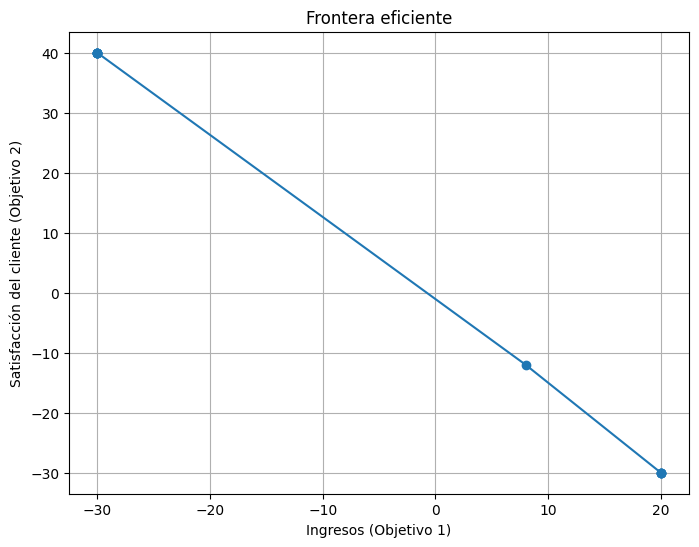

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(df['ingresos'], df['satisfaccion'], marker='o')
plt.xlabel('Ingresos (Objetivo 1)')
plt.ylabel('Satisfacción del cliente (Objetivo 2)')
plt.title('Frontera eficiente')
plt.grid(True)
plt.show()


e

In [ ]:
from pyomo.environ import *
from IPython.display import Markdown, display

# Crear el modelo
model = ConcreteModel()

# Variables de decisión
model.x = Var(domain=NonNegativeReals)
model.y = Var(domain=NonNegativeReals)

# Parámetros de ponderación para los objetivos
w1 = 0.5  # Peso para ingresos
w2 = 0.5  # Peso para satisfacción

# Función objetivo combinada
model.obj = Objective(expr = w1*(-3*model.x + 2*model.y) + w2*(4*model.x - 3*model.y), sense=maximize)

# Restricciones
model.c1 = Constraint(expr = model.x + model.y <= 10)     # Restricción de costos
model.c2 = Constraint(expr = 2*model.x + 3*model.y >= 12)  # Restricción de cuota de mercado

# Resolver el modelo
solver = SolverFactory('glpk')
result = solver.solve(model)

# Mostrar resultados con estilo
def show_result():
    display(Markdown(f"- **Condición de terminación:** `{result.solver.termination_condition}`"))
    display(Markdown(f"- **Valor óptimo de x (inversión):** `{model.x():.2f}`"))
    display(Markdown(f"- **Valor óptimo de y (precios):** `{model.y():.2f}`"))
    display(Markdown(f"- **Valor de la función objetivo combinada:** `{model.obj():.2f}`"))
    display(Markdown(f"---"))
    display(Markdown(f"📌 _Objetivo: Max({w1}·(-3x + 2y) + {w2}·(4x - 3y))_"))

show_result()

- **Condición de terminación:** `optimal`

- **Valor óptimo de x (inversión):** `10.00`

- **Valor óptimo de y (precios):** `0.00`

- **Valor de la función objetivo combinada:** `5.00`

---

📌 _Objetivo: Max(0.5·(-3x + 2y) + 0.5·(4x - 3y))_